Setup

In [1]:
import os

import numpy as np
import sklearn

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
%matplotlib inline

%config Completer.use_jedi = False

# Unsuvervised learning techniques

- dimensionality reduction
- clustering
- anomaly detection
- density estimation

# 1 Clustering

Clustering != classification

Each instance gets assigned to a group. In a dataset without labels we can not use classical classification algorithms anymore. However we can still detect "groups" of data. 

In [3]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

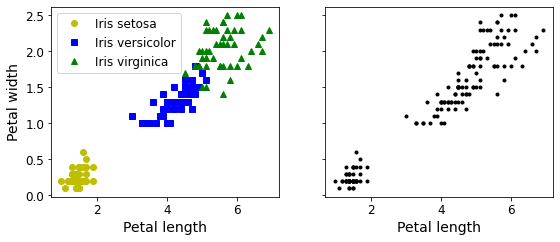

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

On the right we have labeled data so we can use random forests, logistic regression, SVMs etc. On the right we can not but still sort by similarity.

- Clusting can be used for dimensionalty reduction. Each instance has an *affinity*, a measurement on how well it fits to the different clusters. The feature vector can then be replaces by the affinity vector. 

- Clusting can be used for anomaly detection. Does the new instance not fit to any cluster? It could be an anomaly.

- Semi-supervised learning: If you only have labeles for a few points you could assigne the same label to points that have a few labeled points and are in the same cluster.

- Segmentation: i.e. inmages => A lot of pixels have similar colors? Assigne them all a mean colour to reduce the total number of colors.

## 1.1 K-Means

The algorithm:

Place random centroids - label instances - update centroids - label instances - ...repeat... unitl centroids to not move.

Compute a centroid by location by the mean of the postiotions of its instances.
Compute the lables by assigning each point the value of it's closet centroid.

In [5]:
from sklearn.datasets import make_blobs

In [6]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [7]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [8]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

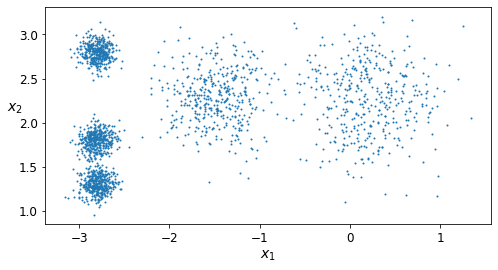

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

Fit

In [10]:
from sklearn.cluster import KMeans

In [11]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [12]:
y_pred                   # Each instance assigned to one of the 5 clusters.
y_pred is kmeans.labels_ 
kmeans.cluster_centers_  # 5 centroids.

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999]])

In [13]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)  # Predict labels of new instances

array([1, 1, 2, 2], dtype=int32)

Decision boundary

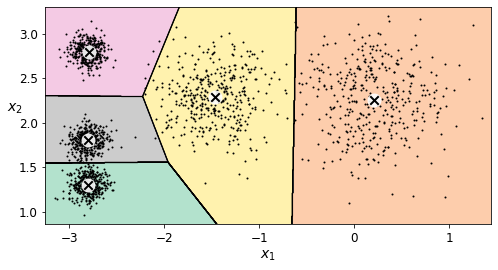

In [14]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Running kmeans multiple times can lead to different clusterings

In [15]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

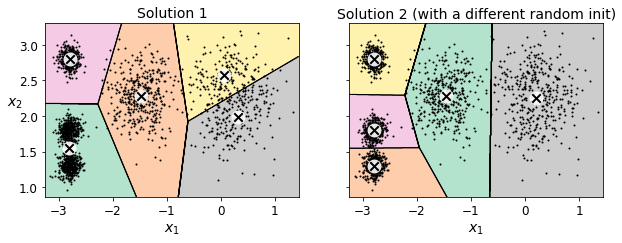

In [16]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

We do not have labeled data so performance measurement is hard. But we can measure the average distance between each point and it's centroid. This is called **Inertia**.

Improved version to mention are: **Accelerated K-Means** and **mini-batch K-Means**.

To find the optimal number ob centroids we use **Silhouette coefficient** which is (b - a) / max(a, b). 

**Limits of K-Mean**

- Varying size of clusters
- Nonspherical clusters

*! It is important to scale the features before you run the alg.*

# 1.2 DBSCAN

Clusters are defiend as continouse regions of high density. 

- For each instance, how many instances are located within a small distance epsilon? This region is called the epsilon-neighborhood.

- If the instance has > hyper_paramter_defined_number instances in it's epsilon-neighborhood it is considered a core instance.

- All instances in the epsilon-neighborhood belong to the same cluster. This epsilon-neighborhood might include instances of other epsilon-neighborhood that for a long sequence of neighborhood instances to form a single cluster

- Any isntance that is not a core instance is an anomaly.

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [18]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [19]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

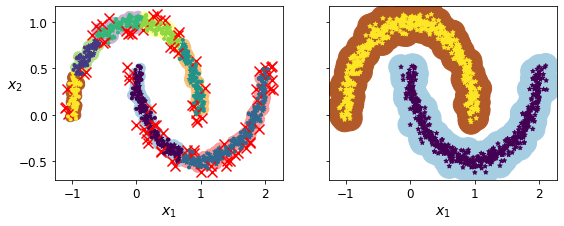

In [20]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

Use for prediction

In [21]:
dbscan = dbscan2

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [24]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [25]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

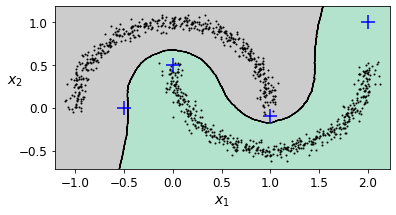

In [26]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

# 1.3 Other cluster algorithms

Agglomerative Clustering

Herarchy cluster - Connecting nearest pairs of clusters starting with individual instances - scales well if connectivity matrix is provided.

BIRCH

Affinity propagation

Instances vote for similar instances to be their representatives - once converged each representative and it's instances form a cluster - can detect any number of clusters but O(m**2) complexity.

Spectrals clustering

Takes similarity matrix between instances - creat low dimensional embedding from it - then uses another alg. in this low dimensional space. 

Does not scale well or works well when clusters have different sizes.

**Gaussian Mixtures**

- Assumption: Instances are generated from mixture of several gaussian distributions which are unknown.

- All instances sampled from a single Gaussian distribution cluster in an ellipsoid.

*Simple*

- k: number of clusters, is known in advance.
- X: generated by
    - For new instance pick a random cluster. Probality of a cluster to be picked is defined by it's weight. 
    - If the instance is assigned to a cluste it's location is sampled from the Gaussian distrbution. 

In [37]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [28]:
from sklearn.mixture import GaussianMixture

In [30]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [31]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [32]:
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

In [33]:
X_new, y_new = gm.sample(6)

In [34]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

In [35]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999215019

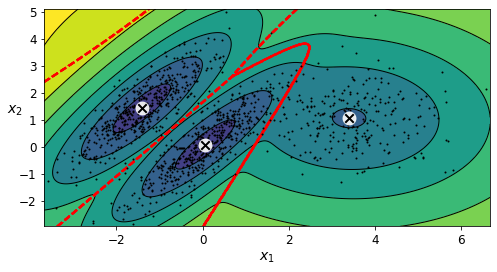

In [36]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

*What can we do with it?*

We want to know the weights of each distribution, the distribution parameters, and the covariances.

*How?*

Expectation-Maximization: 
   - Initialize cluster parameter randomly.
   - Repeat until convergence:
       1. Assign instance to cluster.
       2. Update cluster.
       
Think of it as a generalization of k-means that not only finds the cluster centers (means) but also thier size, shape, orientation, and their realative weights. 

*New instance*

Calculate the likely hood that a new instance belongs to a particular cluster.

*Probality density function*

Source wikipedia: a function whose value at any given sample in the sample space can be interpreted as providing a relative likelihood that the value of the random variable would be close to that sample.

*Anomalie*:

New instanceis in an area of a low probability density.

**Likelihood Function**

- Probability: how plausible is a futur outcome x, knowing parameter values.
- Likelihood: how plausible is a particular set of parameter values, knowing the outcome x.

What if do not know the parameter values but the outcomes? We get the likelihood function. 